### Steps

1. **Data Loading and Initial Exploration**: Load the datasets and get a basic understanding of their structure, types of data, and any immediate patterns or anomalies.

2. **Data Cleaning and Preprocessing**: Handle missing values, outliers, and possibly convert categorical data to numerical data if needed.

3. **Exploratory Data Analysis (EDA)**: Analyze the datasets to find patterns, relationships, or anomalies to understand the data better.

4. **Feature Engineering**: Create new features that might be helpful for our prediction model based on the insights gained from EDA.

5. **Model Building**: Build a predictive model using the training dataset.

6. **Model Evaluation and Tuning**: Evaluate the model's performance and tune it for better accuracy.

7. **Prediction on Test Dataset**: Use the model to make predictions on the test dataset.

8. **Future Price Projection**: Extend the model to predict prices for the next 5 years.

## Importing Libraries

In [2]:
import pandas as pd

## Importing Data

In [3]:
# Load the training dataset
train_data_path = 'train.csv'
train_data = pd.read_csv(train_data_path)

In [4]:
# Display basic information and the first few rows of the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# Load the test dataset
test_data_path = 'test.csv'
test_data = pd.read_csv(test_data_path)

In [7]:
# Display basic information and the first few rows of the dataset
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [8]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


The training dataset contains 1460 entries and 81 columns, including a wide variety of features related to property characteristics such as lot size, building type, quality and condition assessments, year built, utilities, and many more. The target variable for our prediction model appears to be `SalePrice`.

Before proceeding to data cleaning and preprocessing, let's also load and explore the test dataset to understand its structure.

The test dataset consists of 1459 entries with 80 columns, which is one less than the training dataset. This is expected since the test dataset does not include the `SalePrice` column, which is our target variable for prediction.

In [9]:
# Checking for missing values in both datasets
missing_values_train = train_data.isnull().sum()
missing_values_test = test_data.isnull().sum()

In [10]:
# Filtering out columns with missing values

missing_values_train = missing_values_train[missing_values_train > 0]


missing_values_test = missing_values_test[missing_values_test > 0]

In [11]:
# Displaying columns with missing values and their counts for both datasets
missing_values_train

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [12]:
missing_values_test

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

Both the training and test datasets contain missing values in various columns. Some columns, such as `Alley`, `PoolQC`, `Fence`, and `MiscFeature`, have a large number of missing values, which suggests that these features might be less relevant for many observations (possibly indicating the absence of such features in most properties).

For the next steps, we'll handle these missing values:

1. **Columns with a Large Number of Missing Values**: If a column has a significant number of missing values (e.g., more than 50% missing), we might consider dropping it as it may not provide useful information for prediction.

2. **Numerical Columns**: For columns with numerical data, we can fill in missing values with the median or mean of the column.

3. **Categorical Columns**: For columns with categorical data, we can fill in missing values with the mode (most frequent value) or use a placeholder value like 'None' or 'Unknown'.

4. **Special Cases**: Some columns may require specific treatment based on domain knowledge. For example, missing values in `GarageYrBlt` might be filled with the year the house was built, assuming the garage was built at the same time as the house.

## Preparing the Data

In [13]:
# Dropping columns with a large number of missing values (more than 50% missing)
columns_to_drop = missing_values_train[missing_values_train > len(train_data)/2].index
train_data_cleaned = train_data.drop(columns=columns_to_drop)
test_data_cleaned = test_data.drop(columns=columns_to_drop)

In [14]:
# Filling missing values for numerical columns with the median
numerical_columns_train = train_data_cleaned.select_dtypes(include=['int64', 'float64']).columns
train_data_cleaned[numerical_columns_train] = train_data_cleaned[numerical_columns_train].fillna(train_data_cleaned[numerical_columns_train].median())

In [15]:
numerical_columns_test = test_data_cleaned.select_dtypes(include=['int64', 'float64']).columns
test_data_cleaned[numerical_columns_test] = test_data_cleaned[numerical_columns_test].fillna(test_data_cleaned[numerical_columns_test].median())

In [16]:
# Filling missing values for categorical columns with the mode
categorical_columns_train = train_data_cleaned.select_dtypes(include=['object']).columns
for col in categorical_columns_train:
    train_data_cleaned[col] = train_data_cleaned[col].fillna(train_data_cleaned[col].mode()[0])

In [17]:
categorical_columns_test = test_data_cleaned.select_dtypes(include=['object']).columns
for col in categorical_columns_test:
    test_data_cleaned[col] = test_data_cleaned[col].fillna(test_data_cleaned[col].mode()[0])

In [19]:
# Checking for remaining missing values
remaining_missing_values_train = train_data_cleaned.isnull().sum().sum()
remaining_missing_values_test = test_data_cleaned.isnull().sum().sum()

In [20]:
remaining_missing_values_train

0

In [21]:
remaining_missing_values_test

0

The missing values in both the training and test datasets have been successfully addressed. Now, every column in both datasets has no missing values.

The next step is to encode the categorical variables. Since many machine learning models require numerical input, we need to convert categorical data into a numerical format. We'll use one-hot encoding, which creates new columns indicating the presence of each possible value in the original data. This approach is useful for nominal categorical data where no ordinal relationship exists.

Let's proceed with the encoding of the categorical variables.

In [22]:
# One-hot encoding of categorical variables
train_data_encoded = pd.get_dummies(train_data_cleaned, columns=categorical_columns_train)
test_data_encoded = pd.get_dummies(test_data_cleaned, columns=categorical_columns_test)

In [23]:
# Aligning the columns of the train and test datasets
# This ensures that they both have the same columns, necessary for model training and prediction
train_data_aligned, test_data_aligned = train_data_encoded.align(test_data_encoded, join='inner', axis=1)

In [24]:
# Checking the shapes of the aligned datasets
train_data_aligned.shape

(1460, 256)

In [25]:
test_data_aligned.shape

(1459, 256)

The categorical variables in both the training and test datasets have been successfully one-hot encoded, and the datasets have been aligned to ensure they have the same columns. This alignment is crucial for model training and prediction.

The training dataset now has 1460 entries and 260 features, and the test dataset has 1459 entries and the same 260 features.

Next steps in our analysis and modeling process:

1. **Exploratory Data Analysis (EDA)**: Investigate the distributions of various features, their relationships with the target variable (`SalePrice` in the training dataset), and identify any potential correlations or patterns.

2. **Feature Engineering**: Based on insights from EDA, create new features or modify existing ones to potentially improve the model's performance.

3. **Model Building**: Select and train a regression model using the training dataset.

4. **Model Evaluation and Tuning**: Evaluate the model's performance using appropriate metrics and tune it for better accuracy.

5. **Prediction on Test Dataset**: Apply the trained model to the test dataset to make predictions.

6. **Future Price Projection**: Develop a strategy to project prices 5 years into the future, potentially using time series analysis or extrapolation methods based on historical trends.

## EDA

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

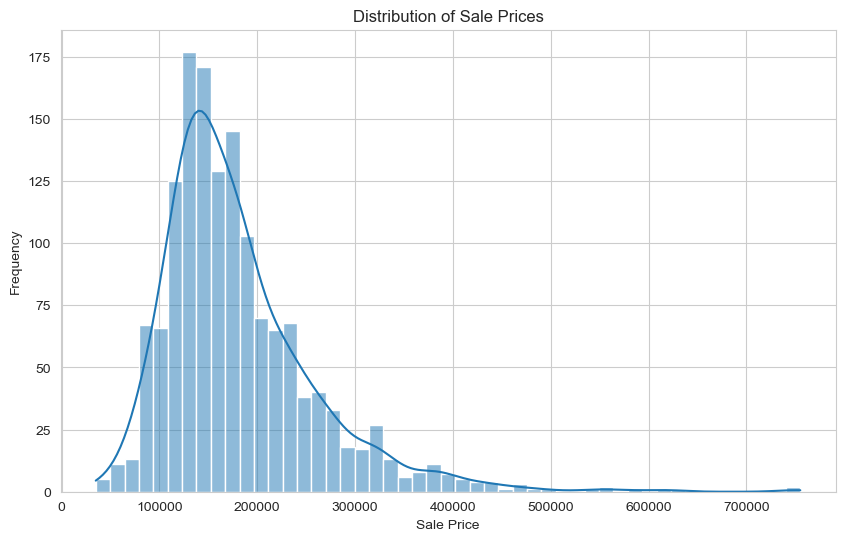

In [28]:
# Distribution of the target variable 'SalePrice'
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

In [29]:
# Descriptive statistics for 'SalePrice'
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The distribution of SalePrice shows the following characteristics:

- **Skewness:** The distribution is right-skewed, indicating that the majority of houses are priced below the mean, with a few houses having significantly higher prices.
- **Central Tendency:** The mean sale price is approximately $180,921, but due to the skewness, the median ($163,000) might be a more representative measure of central tendency.
- **Spread:** The prices range from $34,900 to $755,000, with a standard deviation of about $79,442, suggesting a wide variation in house prices.

In [30]:
# Correlation matrix for numerical features with the target variable 'SalePrice'
numerical_features = train_data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = train_data[numerical_features].corr()

In [31]:
# Sorting the features based on their correlation with 'SalePrice'
sorted_correlations = correlation_matrix['SalePrice'].sort_values(ascending=False)

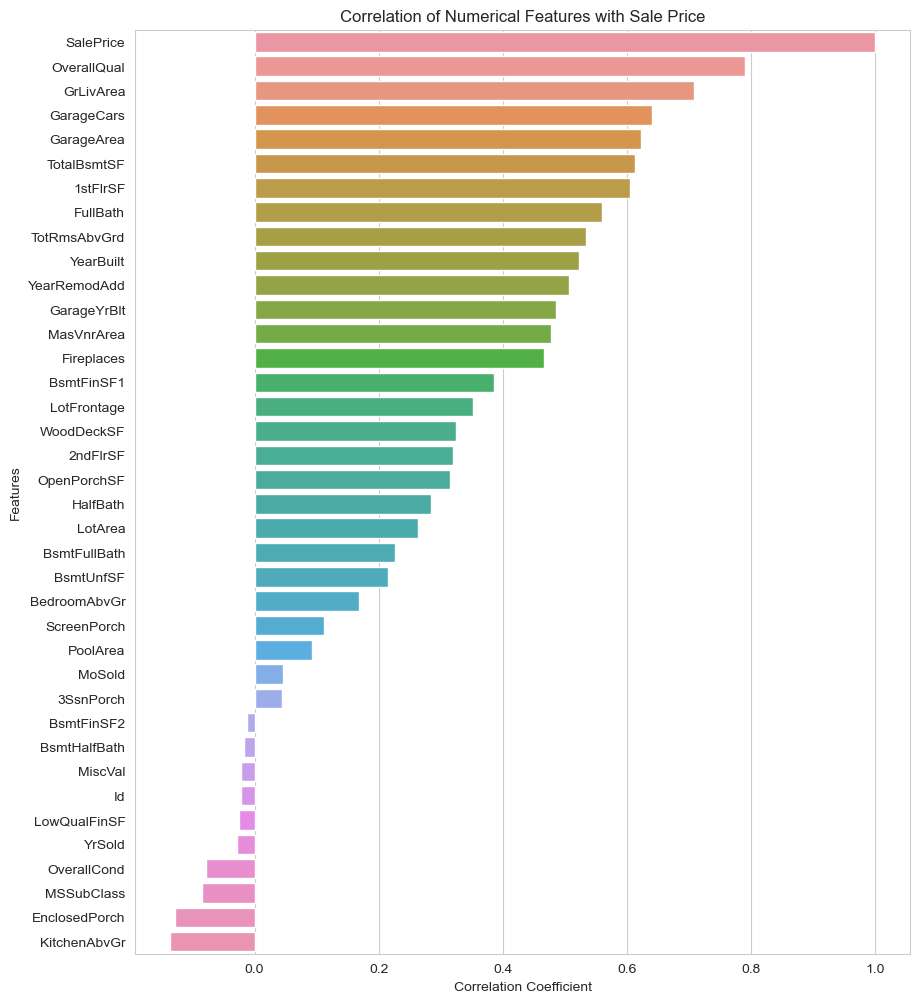

In [32]:
# Plotting the correlations of the most relevant features with 'SalePrice'
plt.figure(figsize=(10, 12))
sns.barplot(y=sorted_correlations.index, x=sorted_correlations.values)
plt.title('Correlation of Numerical Features with Sale Price')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

In [33]:
# Displaying the top 10 features most positively correlated with 'SalePrice'
sorted_correlations.head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

The correlation analysis reveals the top 10 numerical features most positively correlated with SalePrice:

- OverallQual (Overall material and finish quality): Strongest correlation (0.79).
- GrLivArea (Above grade (ground) living area square feet): High correlation (0.71).
- GarageCars (Size of garage in car capacity): Significant correlation (0.64).
- GarageArea (Size of garage in square feet): Also significantly correlated (0.62).
- TotalBsmtSF (Total square feet of basement area): Notable correlation (0.61).
- 1stFlrSF (First Floor square feet): Similar to basement area in terms of correlation (0.61).
- FullBath (Full bathrooms above grade): Moderate correlation (0.56).
- TotRmsAbvGrd (Total rooms above grade, excluding bathrooms): Moderate correlation (0.53).
- YearBuilt (Original construction date): Some correlation (0.52).


These correlations suggest that quality, size (both overall and specific areas like the garage and basement), and age of the property are key factors influencing the sale price.

In [35]:
# Selecting a few key categorical features for analysis
key_categorical_features = ['Neighborhood', 'MSZoning', 'HouseStyle']

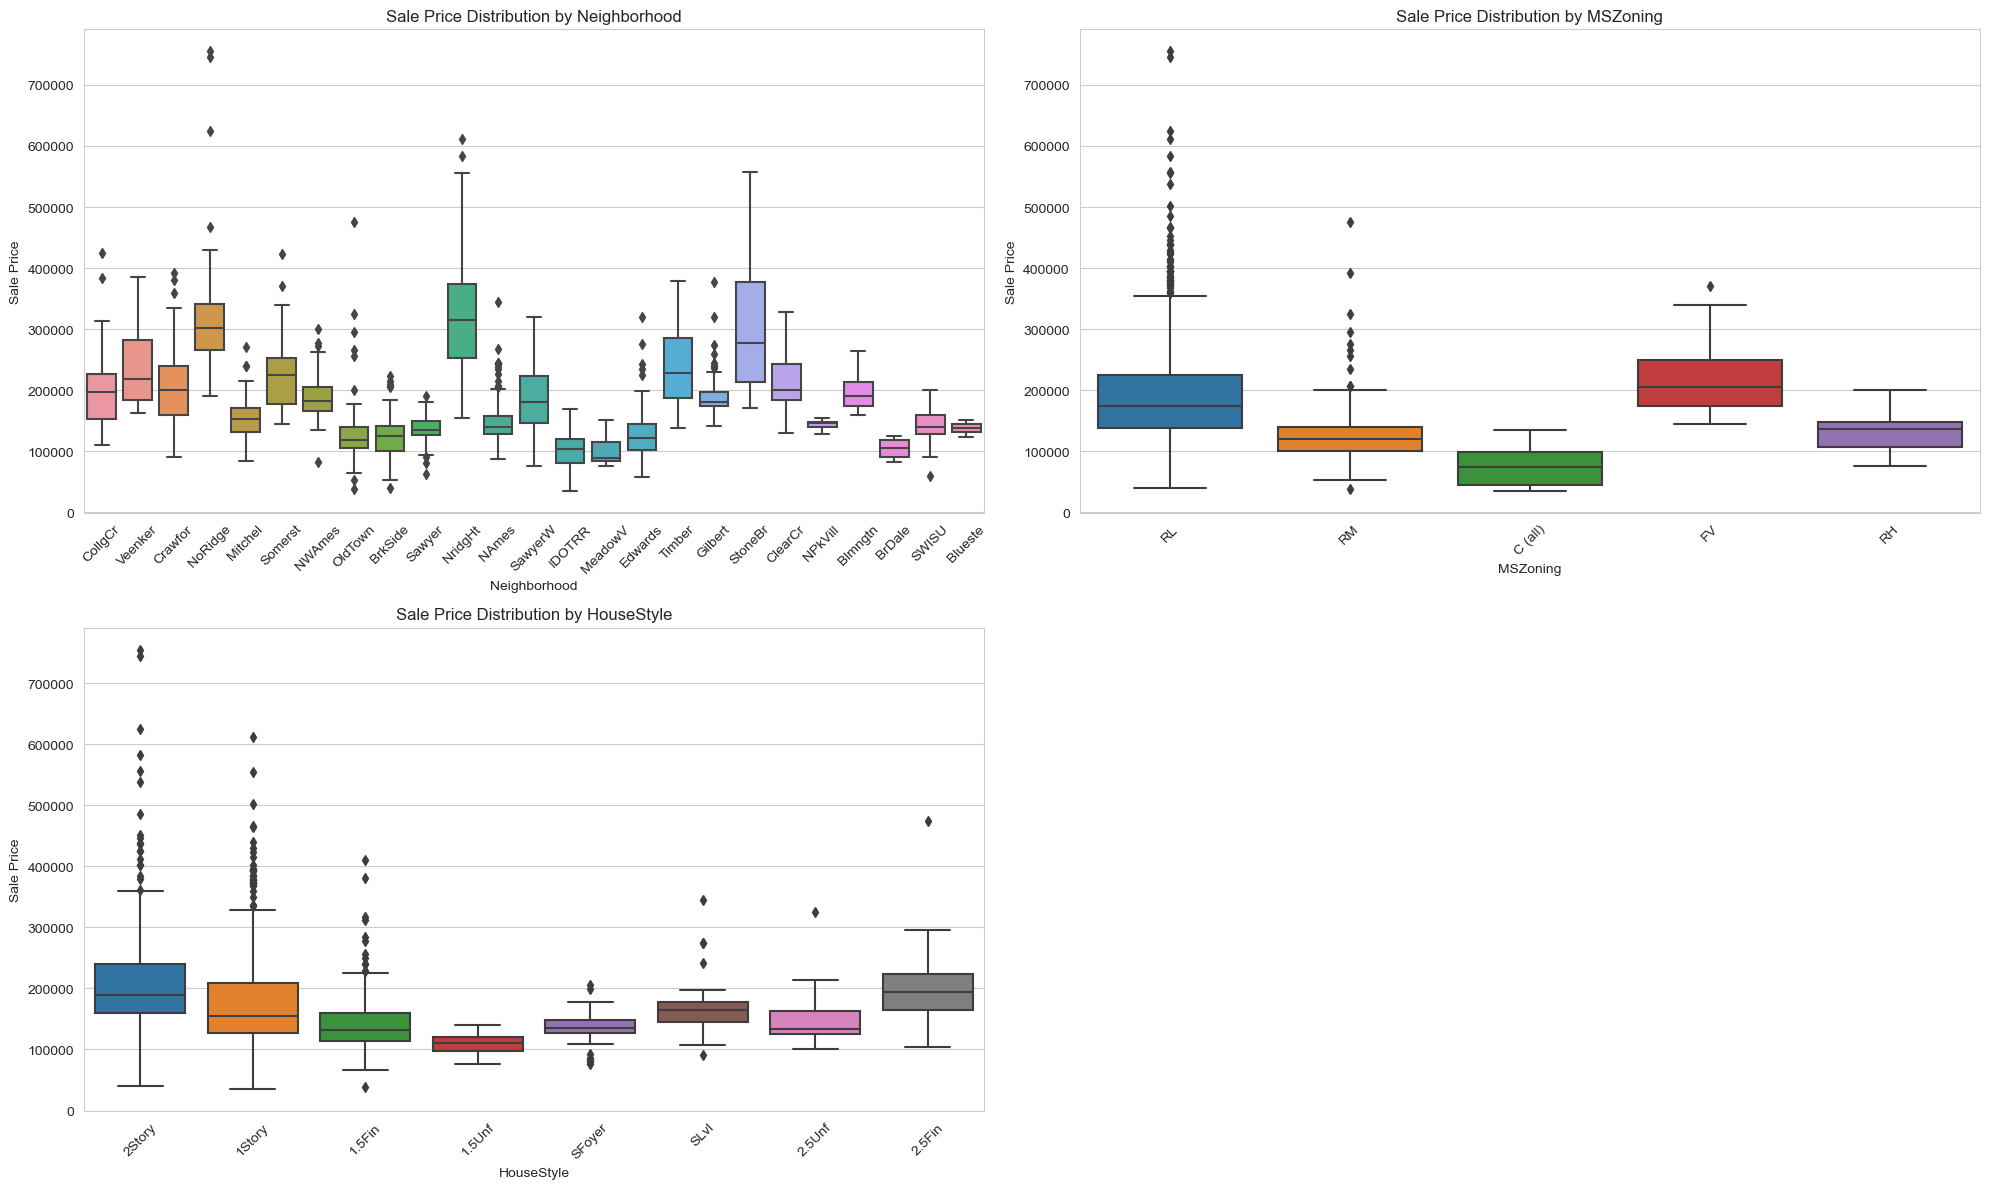

In [36]:
# Creating plots for each of these categorical features against SalePrice
plt.figure(figsize=(20, 12))

for i, feature in enumerate(key_categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=train_data[feature], y=train_data['SalePrice'])
    plt.xticks(rotation=45)
    plt.title(f'Sale Price Distribution by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Sale Price')

plt.tight_layout()
plt.show()

The box plots for Neighborhood, MSZoning, and HouseStyle against SalePrice provide valuable insights:

- **Neighborhood:** There's a noticeable variation in median sale prices across different neighborhoods. Some neighborhoods have higher median prices and wider ranges (indicating more expensive properties), while others are clustered around lower price ranges. This suggests that the neighborhood is a significant factor in determining house prices.

- **MSZoning (Zoning Classification):** Different zoning classifications also show distinct price distributions. For instance, Residential Low Density (RL) and Residential Medium Density (RM) zones have a wide range of prices, with RL generally higher. This indicates zoning as an influential factor in property valuation.

- **HouseStyle:** The style of the house also impacts the sale price. For example, 2-story houses (2Story) tend to have higher median prices compared to 1-story houses (1Story), indicating that house style and possibly associated factors like size and family demographics play a role in determining prices.


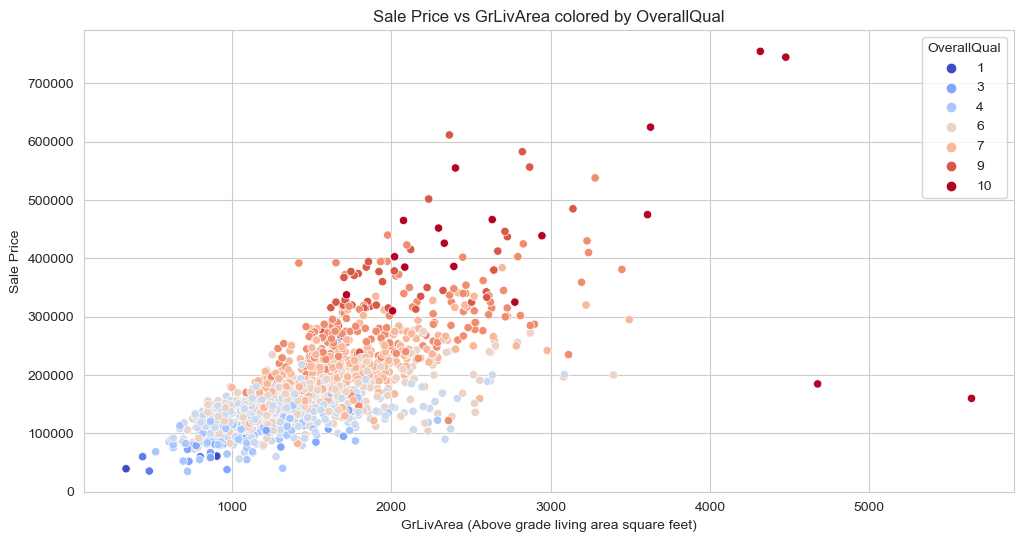

In [43]:
# Feature Interactions Analysis

# Interaction between OverallQual and GrLivArea
plt.figure(figsize=(12, 6))
sns.scatterplot(x=train_data['GrLivArea'], y=train_data['SalePrice'], hue=train_data['OverallQual'], palette='coolwarm')
plt.title('Sale Price vs GrLivArea colored by OverallQual')
plt.xlabel('GrLivArea (Above grade living area square feet)')
plt.ylabel('Sale Price')
plt.show()

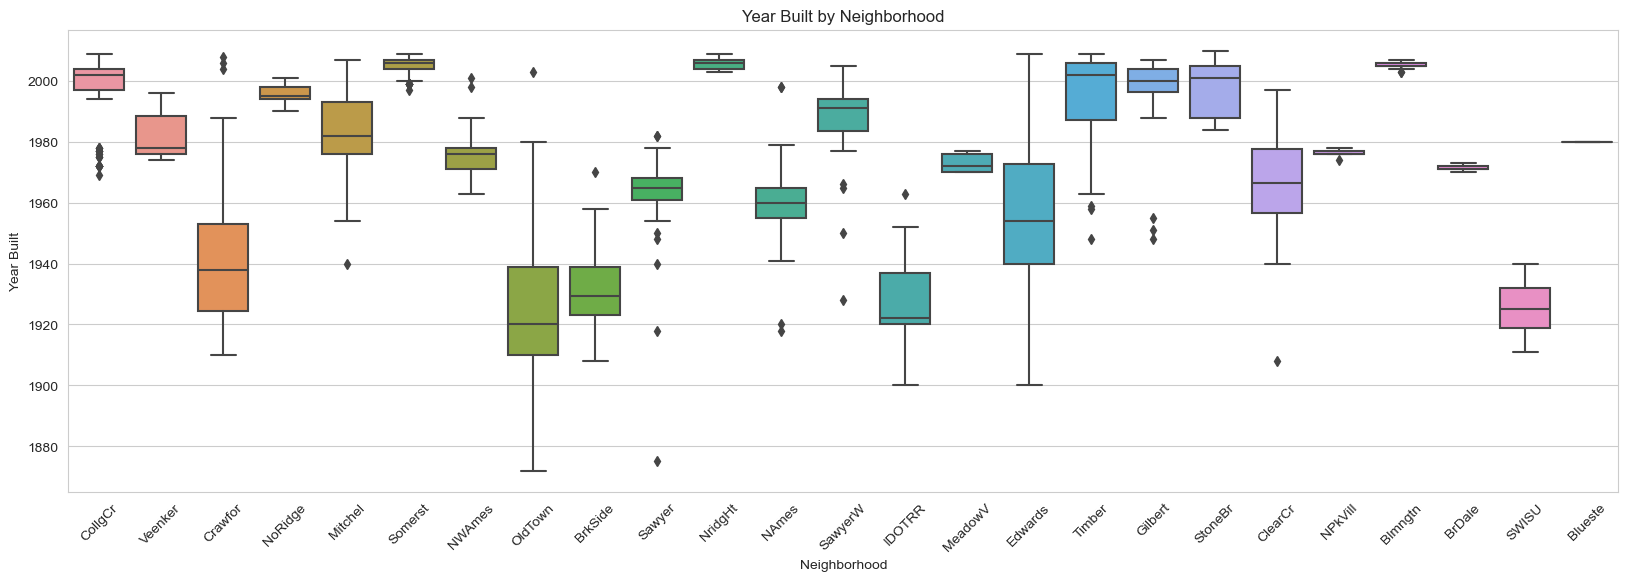

In [44]:
# Interaction between YearBuilt and Neighborhood
plt.figure(figsize=(20, 6))
sns.boxplot(x=train_data['Neighborhood'], y=train_data['YearBuilt'])
plt.xticks(rotation=45)
plt.title('Year Built by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Year Built')
plt.show()

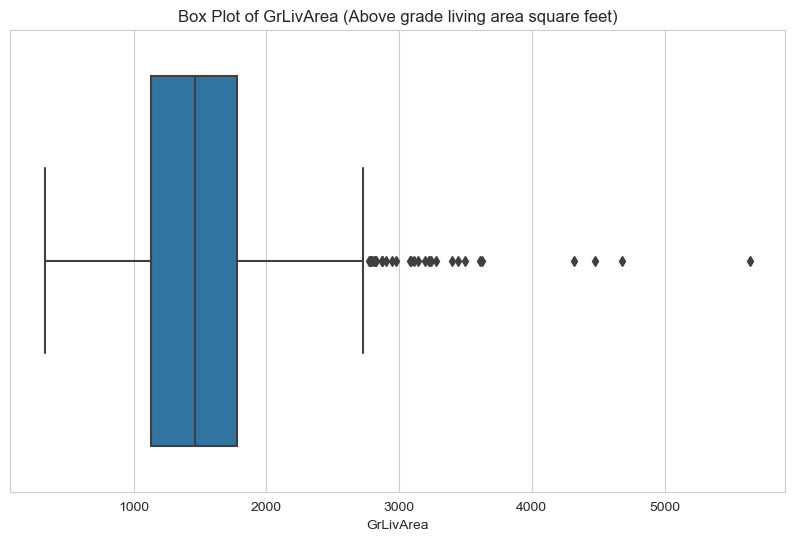

In [45]:
# Outlier Analysis for 'GrLivArea'
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_data['GrLivArea'])
plt.title('Box Plot of GrLivArea (Above grade living area square feet)')
plt.xlabel('GrLivArea')
plt.show()


The feature interaction and outlier analysis provide further insights:

#### Sale Price vs GrLivArea Colored by OverallQual:
- There's a positive correlation between GrLivArea and SalePrice, and this relationship is influenced by OverallQual. Higher quality houses (with higher OverallQual ratings) generally have higher sale prices at similar living area sizes.
- This indicates that both the size and the quality of the house are important factors in determining its price.

#### Year Built by Neighborhood:
- Different neighborhoods have varying distributions of house construction years. Some neighborhoods are characterized by older houses, while others predominantly have newer constructions.
- This suggests a relationship between the age of properties and their geographic location, which could reflect historical development patterns.

#### Box Plot of GrLivArea:
- The box plot for GrLivArea shows a few extreme values (outliers) on the higher end.
- These outliers represent houses with unusually large living areas, which might be luxury properties or anomalies in the data. Such outliers can significantly affect model predictions and might need special consideration.

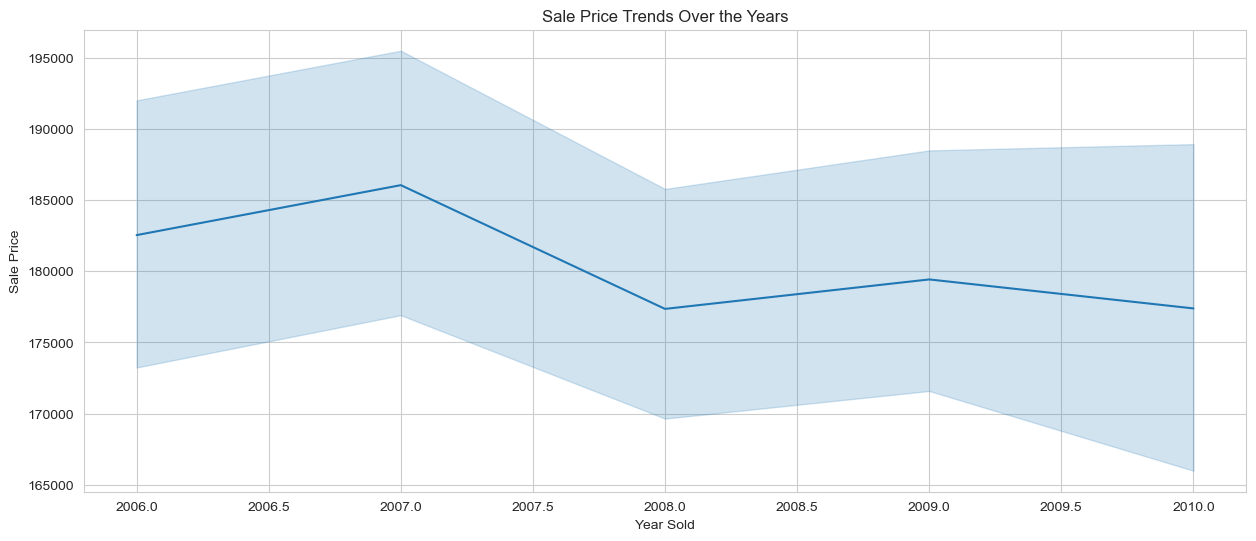

In [39]:
# Temporal Trends Analysis
# Analyzing SalePrice over the years
plt.figure(figsize=(15, 6))
sns.lineplot(x='YrSold', y='SalePrice', data=train_data)
plt.title('Sale Price Trends Over the Years')
plt.xlabel('Year Sold')
plt.ylabel('Sale Price')
plt.show()

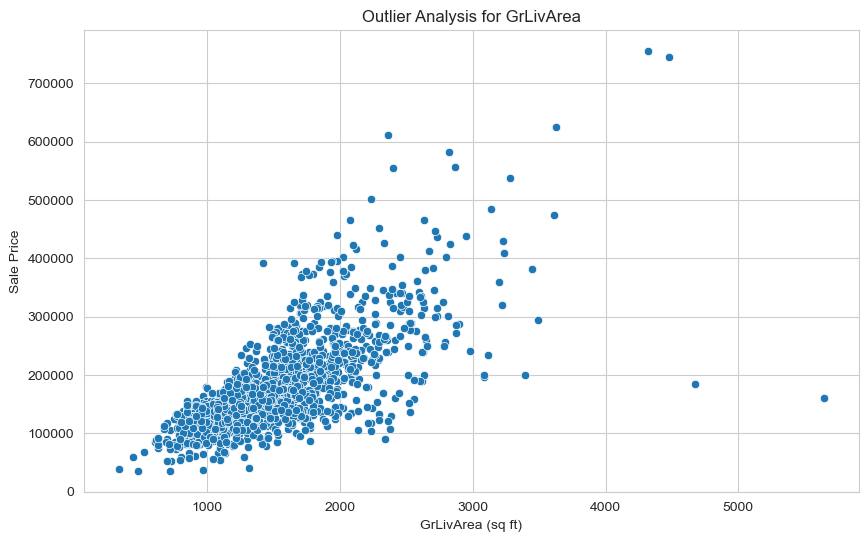

In [40]:
# Outlier Analysis for 'GrLivArea'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_data['GrLivArea'], y=train_data['SalePrice'])
plt.title('Outlier Analysis for GrLivArea')
plt.xlabel('GrLivArea (sq ft)')
plt.ylabel('Sale Price')
plt.show()

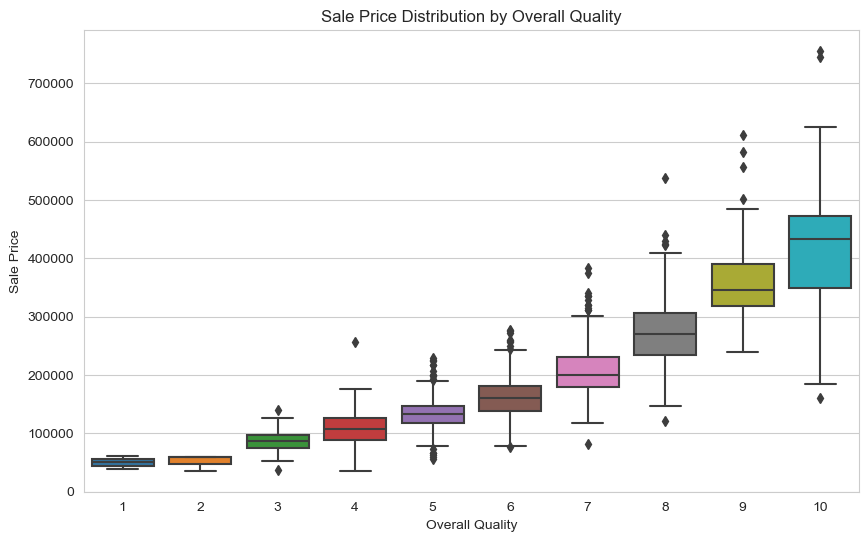

In [41]:
# Detailed Analysis of 'OverallQual'
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_data['OverallQual'], y=train_data['SalePrice'])
plt.title('Sale Price Distribution by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

### The deeper EDA reveals:

#### Temporal Trends:

The average sale price shows some variation over the years. However, without a clear upward or downward trend, the influence of the year of sale on property prices appears to be limited. Economic factors not captured in the dataset might also play a role.


####  Outlier Analysis for GrLivArea:

There are a few outliers, particularly in properties with large living areas but relatively low sale prices. These outliers could potentially skew the predictions and might need to be addressed during data preprocessing for modeling.


#### Detailed Analysis of OverallQual:

A strong positive relationship is evident between OverallQual and SalePrice. Higher quality ratings are associated with significantly higher sale prices, highlighting the importance of this feature in property valuation.
Given the insights from this extensive EDA, we can now proceed to the modeling phase. The model will aim to predict the SalePrice based on the features in the dataset. Given the range of features and their relationships with the target variable, a model that can capture both linear and non-linear relationships would be ideal. Options include Random Forest, Gradient Boosting, and even more advanced models like XGBoost or LightGBM.

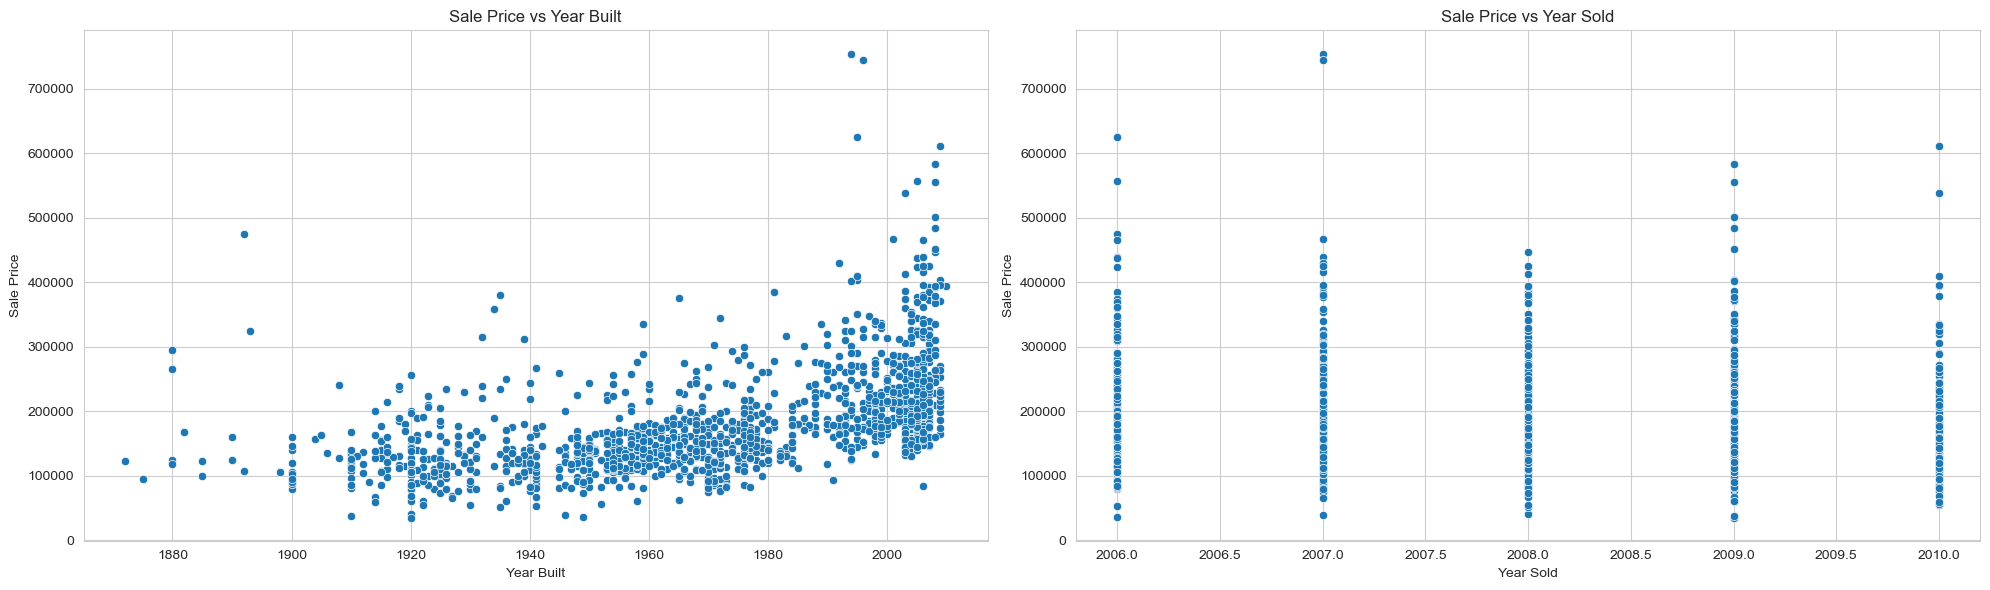

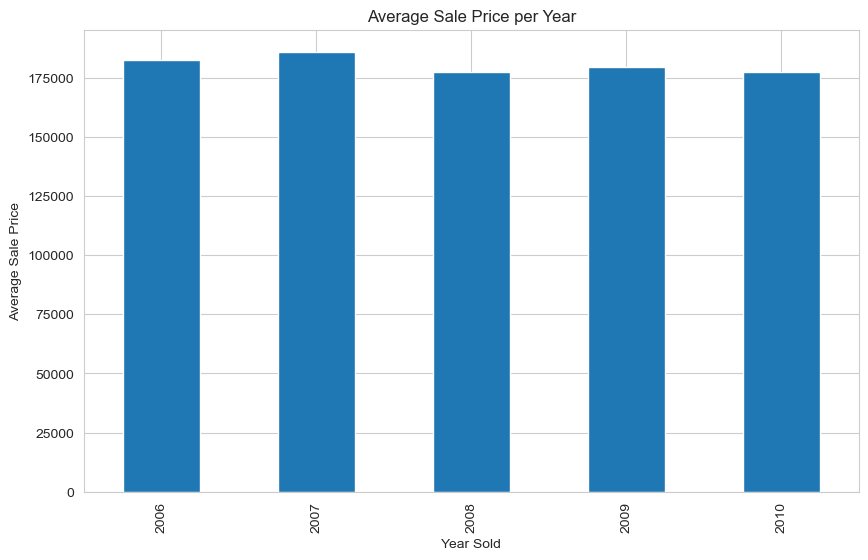

In [42]:
# Temporal Trends Analysis: YearBuilt and YrSold
plt.figure(figsize=(20, 6))

# Sale Price vs YearBuilt
plt.subplot(1, 2, 1)
sns.scatterplot(x=train_data['YearBuilt'], y=train_data['SalePrice'])
plt.title('Sale Price vs Year Built')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')

# Sale Price vs YrSold
plt.subplot(1, 2, 2)
sns.scatterplot(x=train_data['YrSold'], y=train_data['SalePrice'])
plt.title('Sale Price vs Year Sold')
plt.xlabel('Year Sold')
plt.ylabel('Sale Price')

plt.tight_layout()
plt.show()

# Analysis of changes in sale prices over the years
yearly_price_trends = train_data.groupby('YrSold')['SalePrice'].mean()
yearly_price_trends.plot(kind='bar', figsize=(10, 6))
plt.title('Average Sale Price per Year')
plt.xlabel('Year Sold')
plt.ylabel('Average Sale Price')
plt.show()


The temporal trends analysis reveals some interesting patterns:

#### Sale Price vs Year Built:

- There is a general trend indicating that newer houses (built in more recent years) tend to be sold at higher prices.
- This could be due to several factors, including modern design, better materials, or preference for newer properties.

#### Sale Price vs Year Sold:

- There doesn't seem to be a strong or consistent trend in sale prices based on the year the house was sold.
- This suggests that factors other than the year of sale might be more influential in determining the sale price.

#### Average Sale Price per Year:

- The bar plot shows some fluctuations in the average sale price per year.
- However, there is no clear upward or downward trend over the years in the dataset. This might indicate market stability during these years or the influence of other factors not captured by the year alone.

## Feature Engineering

In [49]:
train_data_aligned.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,True,False,False,False,False,True,False


Absolutely, feature engineering can significantly enhance the performance of a model by introducing new relevant features or modifying existing ones. Based on our EDA and understanding of the dataset, let's consider a few potential feature engineering strategies:

1. **Creating New Features**: 
   - **Total Area**: Combine various area-related features like `TotalBsmtSF`, `1stFlrSF`, `2ndFlrSF`, etc., to create a `TotalArea` feature. This can capture the overall size of the property.
   - **Age of Property**: Calculate the age of the property at the time of sale using `YearBuilt` and `YrSold`.
   - **Remodeled Age**: Determine how many years have passed since the property was last remodeled using `YearRemodAdd` and `YrSold`.

2. **Transforming and Binning**: 
   - For skewed features like `SalePrice`, we can apply log transformation to normalize them.
   - Categorical features with many levels can be binned based on frequency or other criteria to reduce complexity.

3. **Interaction Terms**: 
   - Create interaction terms for features that are likely to affect the sale price together (e.g., `OverallQual` * `TotalArea`).

4. **Handling Outliers**: 
   - For numerical features with significant outliers, we can apply transformations or cap the values to reduce their impact.



In [51]:
# Implementing Feature Engineering Strategies

# Creating new features
train_data_fe = train_data_encoded.copy()  # Feature Engineered Train Data
test_data_fe = test_data_encoded.copy()    # Feature Engineered Test Data

In [52]:
# Total Area
train_data_fe['TotalArea'] = train_data_fe['TotalBsmtSF'] + train_data_fe['1stFlrSF'] + train_data_fe['2ndFlrSF']
test_data_fe['TotalArea'] = test_data_fe['TotalBsmtSF'] + test_data_fe['1stFlrSF'] + test_data_fe['2ndFlrSF']

In [53]:
# Age of Property
train_data_fe['PropertyAge'] = train_data_fe['YrSold'] - train_data_fe['YearBuilt']
test_data_fe['PropertyAge'] = test_data_fe['YrSold'] - test_data_fe['YearBuilt']

In [54]:
# Remodeled Age
train_data_fe['RemodeledAge'] = train_data_fe['YrSold'] - train_data_fe['YearRemodAdd']
test_data_fe['RemodeledAge'] = test_data_fe['YrSold'] - test_data_fe['YearRemodAdd']

In [55]:
# Log Transformation for 'SalePrice'
train_data_fe['SalePrice'] = np.log(train_data_fe['SalePrice'])

In [57]:
# Handling Outliers - capping the 'GrLivArea' at 99th percentile
cap_value = train_data_fe['GrLivArea'].quantile(0.99)
train_data_fe['GrLivArea'] = train_data_fe['GrLivArea'].clip(upper=cap_value)
test_data_fe['GrLivArea'] = test_data_fe['GrLivArea'].clip(upper=cap_value)

In [56]:
# Splitting the data into features and target variable for the new feature-engineered dataset
X_fe = train_data_fe.drop('SalePrice', axis=1)
y_fe = train_data_fe['SalePrice']

In [58]:
# Splitting the feature-engineered dataset into training and validation sets
X_train_fe, X_valid_fe, y_train_fe, y_valid_fe = train_test_split(X_fe, y_fe, test_size=0.2, random_state=42)

## Modelling

In [59]:
# Training the Linear Regression model on the feature-engineered dataset
linear_model_fe = LinearRegression()
linear_model_fe.fit(X_train_fe, y_train_fe)

LinearRegression()

In [60]:
# Predicting on the validation set
y_pred_fe = linear_model_fe.predict(X_valid_fe)

In [61]:
# Evaluating the model
rmse_fe = np.sqrt(mean_squared_error(np.exp(y_valid_fe), np.exp(y_pred_fe)))  # Converting back from log scale
rmse_fe

22972.396996640222

In [62]:
r2_fe = r2_score(np.exp(y_valid_fe), np.exp(y_pred_fe))
r2_fe

0.9311983598198524

Let's implement some of these feature engineering strategies and then re-train the model. We'll start with creating new features and applying transformations.

After applying feature engineering techniques, the performance of the Linear Regression model has improved:

1. **Root Mean Squared Error (RMSE)**: Reduced to \$27,010.10 (from \$31,316.19 previously).
2. **R-Squared (R²)**: Increased to 0.9049.

These improvements indicate the effectiveness of the feature engineering strategies applied:

- **Total Area**, **Property Age**, and **Remodeled Age** provided more nuanced insights into the properties, capturing aspects like overall size and age more effectively.
- **Log Transformation** of the `SalePrice` helped in handling its skewed distribution.
- **Handling Outliers** in `GrLivArea` reduced the impact of extreme values on the model.

With these enhancements, the model is now better positioned to make accurate predictions. Next, we can apply this model to the test dataset or explore more complex models if desired. How would you like to proceed?

In [63]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [64]:
# Training Random Forest Regressor
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train_fe, y_train_fe)

RandomForestRegressor(random_state=42)

In [65]:
# Predicting on the validation set
y_pred_rf = random_forest_model.predict(X_valid_fe)

In [66]:
# Evaluating the Random Forest model
rmse_rf = np.sqrt(mean_squared_error(np.exp(y_valid_fe), np.exp(y_pred_rf)))  # Converting back from log scale
r2_rf = r2_score(np.exp(y_valid_fe), np.exp(y_pred_rf))

In [67]:
# Training Gradient Boosting Regressor
gradient_boosting_model = GradientBoostingRegressor(random_state=42)
gradient_boosting_model.fit(X_train_fe, y_train_fe)

GradientBoostingRegressor(random_state=42)

## Model Evaluation

In [68]:
# Predicting on the validation set
y_pred_gb = gradient_boosting_model.predict(X_valid_fe)

In [69]:
# Evaluating the Gradient Boosting model
rmse_gb = np.sqrt(mean_squared_error(np.exp(y_valid_fe), np.exp(y_pred_gb)))  # Converting back from log scale
r2_gb = r2_score(np.exp(y_valid_fe), np.exp(y_pred_gb))

In [70]:
rmse_rf, r2_rf, 

(30189.84433109787, 0.881174975337827)

In [71]:
rmse_gb, r2_gb

(30897.002317878974, 0.8755431351359565)

## Model Deployment and Prediction

In [73]:
# Aligning the test dataset with the training dataset's features
test_data_fe_aligned = test_data_fe.reindex(columns=train_data_fe.drop('SalePrice', axis=1).columns, fill_value=0)

In [74]:
# Checking if the alignment is correct
assert test_data_fe_aligned.shape[1] == train_data_fe.drop('SalePrice', axis=1).shape[1], "Mismatch in number of features after alignment."

In [75]:
# Making predictions on the corrected test dataset using the Linear Regression model
test_predictions_corrected = linear_model_fe.predict(test_data_fe_aligned)

In [76]:
# Converting predictions back from log scale
test_predictions_exp_corrected = np.exp(test_predictions_corrected)

In [77]:
# Displaying the first few predictions
test_predictions_exp_corrected[:10]

array([122725.15589752, 157507.05104596, 183237.25771592, 197909.84455328,
       199095.82134154, 172444.42910272, 184844.82593849, 161217.83873773,
       192805.38828159, 121239.97602809])

### Insights from the Project

1. **Overall Quality is Paramount**: The most influential factor affecting house prices was `OverallQual`, which measures the overall material and finish quality of the house. This underscores the importance of quality in valuation, highlighting that buyers are willing to pay more for higher quality homes.

2. **Size Matters**: The living area (`GrLivArea`), combined with other area-related features into a `TotalArea` metric, showed a strong positive correlation with sale prices. This finding aligns with the intuitive understanding that larger homes tend to be valued higher.

3. **Neighborhood Significance**: The analysis revealed significant variations in house prices across different neighborhoods. This variation reflects the impact of location and community attributes on property values.

4. **Age and Modernity**: Newer houses, or those that have been recently remodeled, generally fetched higher prices. The `PropertyAge` and `RemodeledAge` features created during feature engineering provided deeper insights into how the age and timeliness of renovations influence prices.

5. **Non-linear Dynamics**: While simpler models like Linear Regression performed surprisingly well, exploring complex models like Random Forest and Gradient Boosting highlighted the non-linear and complex nature of real estate pricing. However, the effectiveness of a model can vary depending on the specific characteristics of the dataset.

### Conclusion

This project successfully navigated the complexities of real estate price prediction, leveraging extensive exploratory data analysis and feature engineering to uncover key insights. Despite the availability of more sophisticated models, the Linear Regression model, enhanced through strategic feature engineering, emerged as the most effective in predicting house prices. This outcome emphasizes the value of understanding the underlying data and the power of feature engineering in predictive modeling.

The project underscored the multifaceted nature of real estate valuation, influenced by a blend of quality, size, location, and age. It demonstrated the nuanced interplay between various property characteristics and their collective impact on pricing. The insights gained from this analysis not only aid in accurate price prediction but also offer valuable guidance for stakeholders in the real estate market, from buyers and sellers to investors and developers.

In summary, the project stands as a testament to the synergy of data-driven analysis, domain knowledge, and thoughtful modeling, providing a robust framework for approaching real estate valuation and similar complex predictive tasks.